<a href="https://colab.research.google.com/github/styagi7/Capstone/blob/styagi/NLP_Automated_Ticket_Assignment_Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Great Learning - Capstone Project - NLP | Automated Ticket Assignment
*  **Submitted By**: Gaurav, Karishma, Lavanya, Pallavi and Swati 
* **Status** : In-Progress (EDA, Feature Engineering & Selection)
* **Date of Submission** : 29-March-2020
* **Dataset** : https://drive.google.com/drive/u/0/folders/1xOCdNI2R5hiodskIJbj-QySMQs6ccehL

# Problem Statement
One of the key activities of any IT function is to ensure there is no impact to the Business operations through Incident Management process. An incident is an unplanned interruption to an IT service or reduction in the quality of an IT service that affects the Users and the Business.

The main goal of Incident Management process is to provide a quick fix / workarounds or solutions that resolves the interruption and restores the service to its full capacity to ensure no business impact.

These incidents are created by various stakeholders (Business Users, IT Users and Monitoring Tools) within IT Service Management Tool and are assigned to Service Desk teams (L1 / L2 teams). 

**The goal of this project is to build a classifier that can classify the incidents by analysing text**.


# Solution
The solution is to build a classification model that can analyse the text and classify to appropriate Service Desk team.

# Approach


*   Analyse and Understand the structure of data
*   Visualize data
*   Text preprocessing
*   Create word vocabulary and Tokens
*   Build a Classification model
*   Train the model
*   Test the Model 

## Get Required Files from Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# changing present working directory
import os
os.chdir("/content/drive/My Drive/Capstone Project/NLP")
os.getcwd()

'/content/drive/My Drive/Capstone Project/NLP'

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.set_palette("Spectral")
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer

#import DataPreprocessor as DP

from pprint import pprint
from sklearn import preprocessing 

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [0]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
words = set(nltk.corpus.words.words())
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['received from', 'hi', 'hello','i','am','cc','sir','good morning','gentles','dear','kind','best','please',''])
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from gensim.utils import tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


#**## Reading and Exploring Data**

## Reading Data "Input Data Synthetic (created but not used in our project).xlsx". Exploring the data and getting some insights about the data.

In [0]:
# Read Dataset
file_name = "Ticket_Data.xlsx" 
df = pd.read_excel(file_name,encoding='cp1252')
df = df.rename(columns = {"Short description": "Short_description",
                          "Assignment group": "Group"})
DELETE_CALLER = False #True

df.head()

,Short_description,Description,Caller,Group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [0]:
# Checking Shape of the data
print("Data shape:", df.shape)
print("Data Description:")
df.describe()

Data shape: (8500, 4)
Data Description:


,Short_description,Description,Caller,Group
count,8492,8499,8500,8500
unique,7481,7817,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


In [0]:
# Drop duplicate rows
df_v1 = df
df_v1 = df_v1.drop_duplicates(keep='first', inplace=False)
df_v1.shape

(8417, 4)

## Exploratory Data Analysis (EDA)


In [0]:
# def wordCloudText(df_column):
#   title = ("Most Frequent words in ") + df_column.name
#   stopwords = set(STOPWORDS)
#   wordcloud = WordCloud(background_color='black', stopwords=stopwords, max_words=200,
#                         max_font_size=40, random_state=42).generate(str(df_column.values.tolist()))
#   print(wordcloud)
#   fig = plt.figure(1,figsize = (20, 8))
#   plt.imshow(wordcloud)
#   plt.title(title ,fontsize=30)
#   plt.axis('off')
#   plt.show()

In [0]:
# wordCloudText(df.Short_description)

In [0]:
# wordCloudText(df.Description)

## Drop "Caller" column based on flag set by DELETE_CALLER. It seems to be anonymised data (usernames/ids). 

In [0]:
if DELETE_CALLER:
  df_v1 = df.drop('Caller',axis=1)
else:
    df_v1 = df.copy()
df_v1.head(20)

,Short_description,Description,Caller,Group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0


In [0]:
# Fetch rows with same data in "Short_description" & "Description"
df_v1[df_v1['Short_description'] == df_v1['Description']].count()

Short_description    2862
Description          2862
Caller               2862
Group                2862
dtype: int64

## Finding & Imputing Null values in Short Description & Description columns

In [0]:
# Check for number of null values in each columns
print("Total Null Values in data:", df_v1.isnull().sum().sum())
print("\nNull Values accross columns:\n", df_v1.isnull().sum())
print("\nData with 'Null' Short Description")
df_v1.loc[df_v1['Short_description'].isnull()==True]

Total Null Values in data: 9

Null Values accross columns:
 Short_description    8
Description          1
Caller               0
Group                0
dtype: int64

Data with 'Null' Short Description


,Short_description,Description,Caller,Group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0


In [0]:
print("\nData with 'Null' Description")
df_v1.loc[df_v1['Description'].isnull()==True]


Data with 'Null' Description


,Short_description,Description,Caller,Group
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [0]:
# Impute missing values
df_v1['Short_description'].fillna('the', inplace=True) # replacing null values with stopword 'the'
df_v1['Description'].fillna('the', inplace=True) # replacing null values with stopword 'the'

print("Null values imputed")
print("Null Values in data after imputation:", df_v1.isnull().sum().sum())

Null values imputed
Null Values in data after imputation: 0


## For "Assignment Group" type where number of tickets in the category is less than specified freuency, we will mark then into "GRP_Manual". All "GRP_Manual" tickets should be triaged manually, until the model has enough data to categorise them automatically.

In [0]:
# Reset Assignment Group for group types with less data
#CHANGE
Frequency_Threshold = 1 # 50 #5
count = df_v1['Group'].value_counts(ascending=True)
idx = count[count.lt(Frequency_Threshold)].index
df_v1.loc[df_v1['Group'].isin(idx), 'Group'] = 'GRP_Manual'
print("Updated unique group types",df_v1['Group'].nunique())
df_v1['Group'].value_counts(ascending=True)


Updated unique group types 74


GRP_73       1
GRP_64       1
GRP_67       1
GRP_35       1
GRP_61       1
          ... 
GRP_9      252
GRP_12     257
GRP_24     289
GRP_8      661
GRP_0     3976
Name: Group, Length: 74, dtype: int64

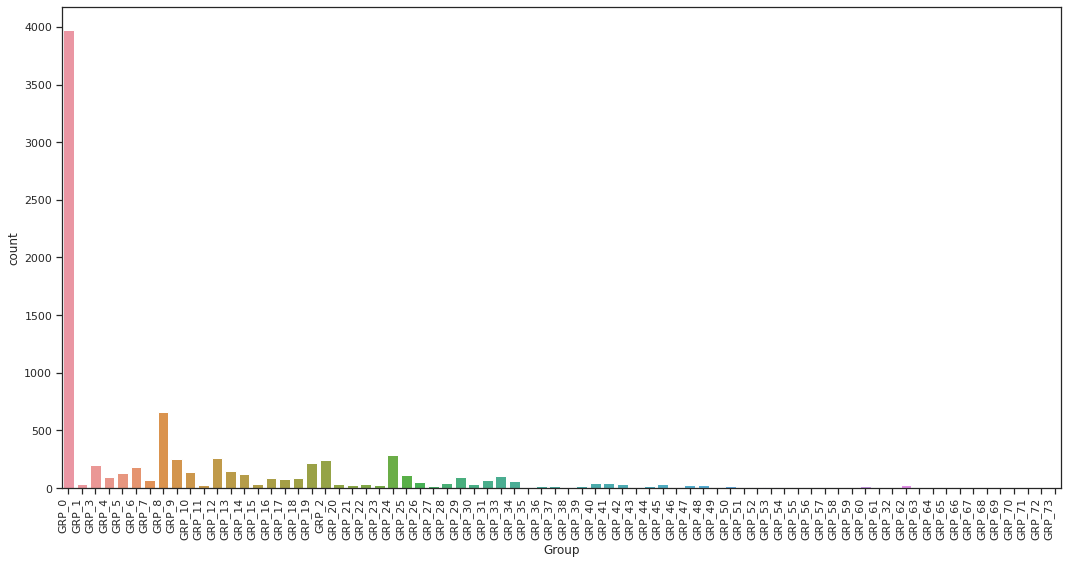

In [0]:
plt.figure(figsize=(15,8))
sns.countplot(x="Group", data=df_v1)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Visualisations

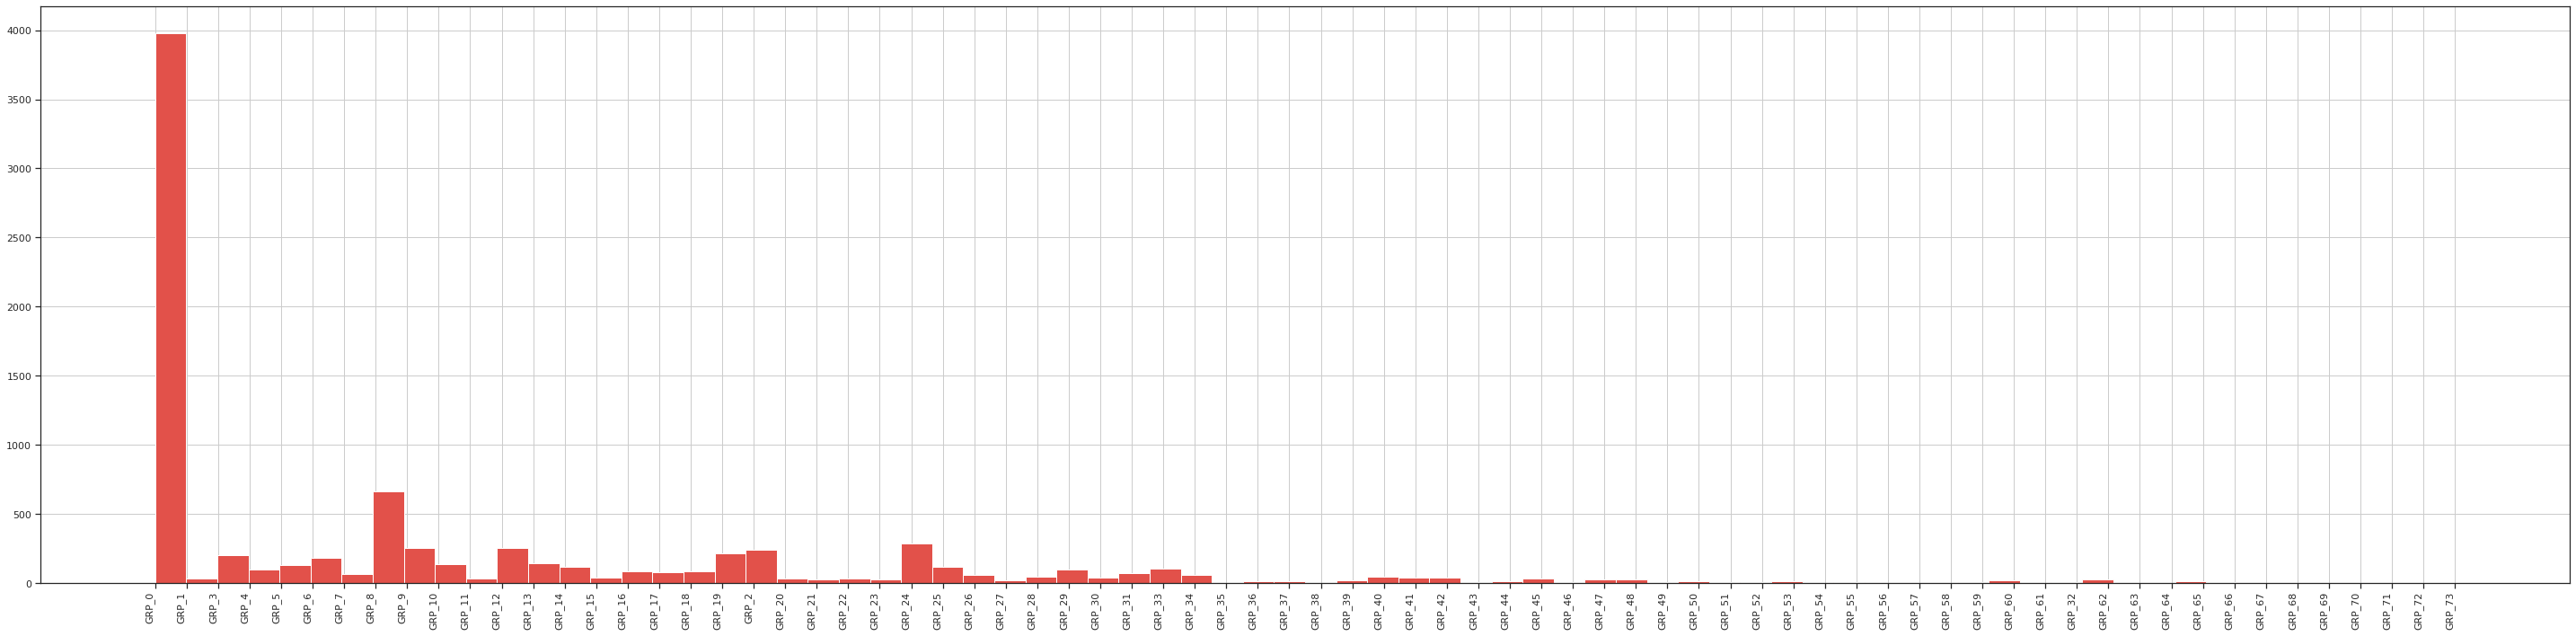

In [0]:
# Checking the distribution of groups
df['Group'].hist(figsize=(40,10),bins=74)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

In [0]:
#Creating dataframe of Groups on the basis of their value counts
n_grp = list(df['Group'].value_counts())
grp_name = list(df['Group'].value_counts().index)

grp = pd.DataFrame(data=grp_name,columns=['grp_name'])
grp['n_grp'] = n_grp
print(len(grp['n_grp']))
print(grp.head())

74
  grp_name  n_grp
0    GRP_0   3976
1    GRP_8    661
2   GRP_24    289
3   GRP_12    257
4    GRP_9    252


In [0]:
# plt.figure(figsize=(15,8))
# sns.barplot(x="grp_name", y="n_grp", data=grp,palette='plasma')
# plt.xticks(rotation=90, ha='right')
# plt.tight_layout()

In [0]:
# fig = px.pie(grp,values='n_grp', names='grp_name')
# fig.show()

In [0]:
# #Visualizing some of the Caller data with anonymous names
# plt.figure(figsize=(20, 10))
# df['Caller'].value_counts().head(30).plot(kind='barh', figsize=(6,10))

In [0]:
# caller_data=pd.DataFrame(df['Caller'].value_counts().to_frame()).T
# caller_data

In [0]:
#Creating dataframe of callers on the basis of their frequency of calling
n_caller = list(df['Caller'].value_counts())
caller = list(df['Caller'].value_counts().index)

data = pd.DataFrame(data=caller,columns=['caller'])
data['n_caller'] = n_caller
len(data['caller'])

2950

In [0]:
#Since caller column contains anonymous data, assigning name Caller1, Caller2,..... for better visualization 
count = 0
new_caller = []
while count != len(data):
    new_caller.append('Caller'+''+ str(count+1))
    count = count +1
data['caller'] = new_caller
data = data.head(20)
data.head(10)

,caller,n_caller
0,Caller1,810
1,Caller2,151
2,Caller3,134
3,Caller4,87
4,Caller5,71
5,Caller6,64
6,Caller7,63
7,Caller8,57
8,Caller9,54
9,Caller10,51


In [0]:
# #top 20 callers
# fig = px.bar(data, x='caller', y='n_caller',hover_data=['n_caller'])
# fig.show()

## Text Cleaning

In [0]:
import string 
import re

# Function for Text Cleaning with regex. Pass the column
def text_preprocessing(df_column):
  data = df_column.values.tolist() # Convert to list
  temp = []
  for sentence in data:
      sentence = sentence.replace("select the following link to view the disclaimer in an alternate language", '')  # remove disclaimer text      
      sentence = re.sub(r"\[(.*?)\]"," ", sentence)  # remove text in []
      sentence = re.sub(r"\((.*?)\)"," ", sentence)  # remove text in ()
      sentence = re.sub(r"[[h][t][t][p][\S]+|[w][w][w][\S]+|[\S]+[@][\S]+"," ", sentence)  # remove email addresses, web address and urls
      sentence = re.sub(r"[\S]+[\d]+[\S]+"," ", sentence) # remove alphanumerics and numerics (dates, time, request id etc.)
      sentence = re.sub(r"\W(?<!['. ])"," ", sentence)  # remove all non words with negative look back except ('. spaces) 
      sentence = re.sub(r"[^a-zA-z.| ]+"," ", sentence) # remove non-alphabetic text
      sentence = re.sub(r"[\_]+"," ", sentence) # remove underscores
      sentence = re.sub(r"[\s]+"," ", sentence) # replace multiple spaces with single space
      sentence = sentence.strip('\n')
      sentence = sentence.lower()
      temp.append(sentence)
  return(temp)

In [0]:
# Cleaned both - 'Short_Description & Description'
df_v1.Short_description = text_preprocessing(df_v1.Short_description)
df_v1.Description = text_preprocessing(df_v1.Description)
df_v1.head()

,Short_description,Description,Caller,Group
0,login issue,verified user details. checked the user name ...,spxjnwir pjlcoqds,GRP_0
1,outlook,received from hello team my meetings skype me...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,received from hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


## Concatenating "Short Description" and "Description" to get "Summary" Tickets

In [0]:
df_v1["Summary"] = df_v1['Short_description'].str.cat(df_v1['Description'], sep = ". ")
df_v2 = df_v1.copy()
#df_v2 = df_v1.drop(['Short_description','Description'],axis=1)
df_v2 = df_v1.drop(['Short_description','Description','Caller'],axis=1)
df_v2.head(20) 

,Group,Summary
0,GRP_0,login issue. verified user details. checked t...
1,GRP_0,outlook. received from hello team my meetings...
2,GRP_0,cant log in to vpn. received from hi i cannot...
3,GRP_0,unable to access hr tool page. unable to acces...
4,GRP_0,skype error . skype error
5,GRP_0,unable to log in to engineering tool and skype...
6,GRP_1,event the value of mountpoint threshold for . ...
7,GRP_0,employment status new non employee . employm...
8,GRP_0,unable to disable add ins on outlook. unable t...
9,GRP_0,ticket update on . ticket update on


## Word cloud generated for the Cleant data in Summary Column

In [0]:
# wordCloudText(df_v2.Summary)

In [0]:
# # word tokenisation & removal of stop words & gibberish word(by typos, anonymised names)

# Remove stopwords
df_v2['Summary'] = df_v2['Summary'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# Remove words not in Englsih Dictionary (typos, anonymised names)
df_v2['Summary'] = df_v2['Summary'].apply(lambda x: ' '.join([word for word in x.split() if word in (words)]))

# Tokenise 'Summary' column
data = df_v2.Summary.values.tolist()

data = [list(tokenize(sentences)) for sentences in data]

token_data = data

# lemmetise words
wordnet_lemmatizer = WordNetLemmatizer()
temp = []
for eachrow in data:
    lemma_words = []
    for eachword in eachrow:
        eachword = wordnet_lemmatizer.lemmatize(eachword, pos = "n")
        eachword = wordnet_lemmatizer.lemmatize(eachword, pos = "v")
        eachword = wordnet_lemmatizer.lemmatize(eachword, pos = ("a"))
        lemma_words.append(eachword)
    temp.append(lemma_words)

# temp   

data = temp 

data = [(" ".join(sentence))  for sentence in data]

# data
#token_data
df_v2

,Group,Summary
0,GRP_0,login user checked user name ad reset advised ...
1,GRP_0,received team outlook calendar somebody advise...
2,GRP_0,cant log received cannot log
3,GRP_0,unable access tool unable access tool page
4,GRP_0,error error
...,...,...
8495,GRP_29,coming received good afternoon sent advise
8496,GRP_0,telephony telephony issue
8497,GRP_0,password reset password reset
8498,GRP_62,machine n unable access machine finish drawers...


In [0]:
maxlen = 0
for sentence in data:
    if (maxlen < sentence.count(' ')+1 ):
        maxlen = sentence.count(' ')+1

print(maxlen)   

# Create Weighted Word Vectors
tfidf_vectors = TfidfVectorizer(min_df=3,max_features= maxlen)
tfidf_db = tfidf_vectors.fit_transform(data).toarray()
tfidf_db = pd.DataFrame(tfidf_db)

367


In [0]:
tfidf_db.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366
0,0.214291,0.00000,0.0,0.0,0.0,0.0,0.0,0.286802,0.0,0.0,0.0,0.278404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.551876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.530371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.54983,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.501398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.498599,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# data

In [0]:
le = preprocessing.LabelEncoder() 
df_v2['Group']= le.fit_transform(df_v2['Group']) # LabelEncode 'Groups'
df_v2.head(20) 

,Group,Summary
0,0,login user checked user name ad reset advised ...
1,0,received team outlook calendar somebody advise...
2,0,cant log received cannot log
3,0,unable access tool unable access tool page
4,0,error error
5,0,unable log engineering tool unable log enginee...
6,1,event value threshold event value threshold
7,0,employment status new non employee employment ...
8,0,unable disable add unable disable add outlook
9,0,ticket update ticket update


## Sampling Minority Class using RandomOverSampler


In [0]:
# Getting the dataset ready (X and y)

X = tfidf_db
y = df_v2['Group']
X.shape

(8500, 367)

In [0]:
X_maj = X[(y == 0)]
y_maj = y[(y==0)]

print("X shape = %f",X_maj.shape)
print("Y shape = %f",y_maj.shape)

X shape = %f (3976, 367)
Y shape = %f (3976,)


In [0]:
# Picking records from the Major class randomly
X_maj = X_maj.sample(frac = 0.25) 
y_maj = y_maj[0:994]
print("X shape = %f",X_maj.shape)
print("Y shape = %f",y_maj.shape)

X shape = %f (994, 367)
Y shape = %f (994,)


In [0]:
#Drop X values for y==0 in X and then concatenate X_maj to the dataframe
X_bal = X[y!=0]
y_bal = y[y!=0]
X_bal.shape
y_bal.shape

(4524,)

In [0]:
sets_x = [X_bal,X_maj]
X = pd.concat(sets_x)

sets_y = [y_bal,y_maj]
y = pd.concat(sets_y)
print("X shape = %f",X.shape)
print("Y shape = %f",y.shape)

X shape = %f (5518, 367)
Y shape = %f (5518,)


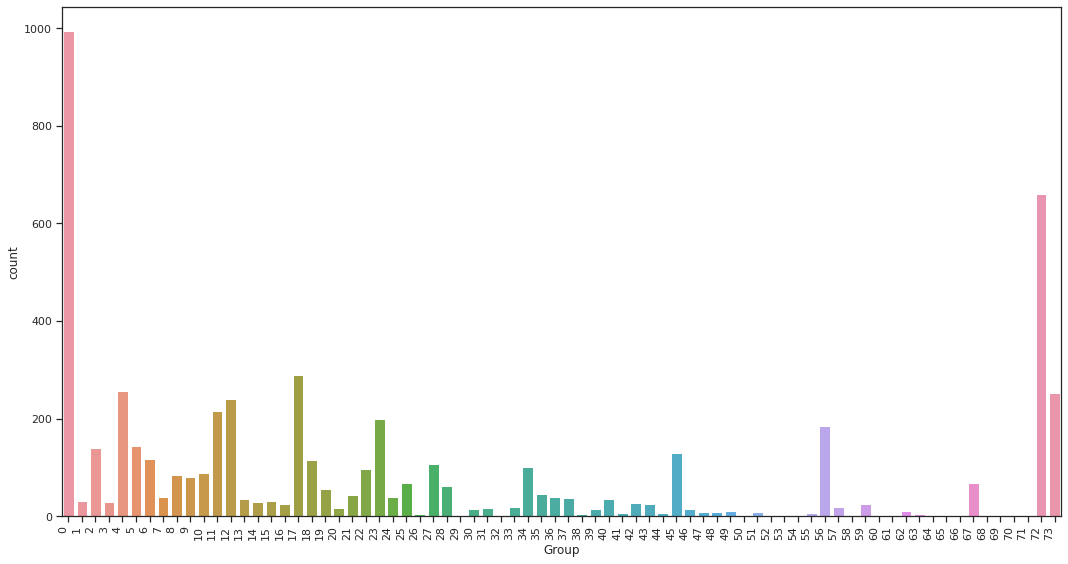

In [0]:
# Checking the distribution of groups
# import matplotlib.pyplot as plt
# plt.hist(y_ros)

plt.figure(figsize=(15,8))
sns.countplot(y)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

In [0]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print("X shape = %f",X_ros.shape)
print("Y shape = %f",y_ros.shape)


X shape = %f (73556, 367)
Y shape = %f (73556,)


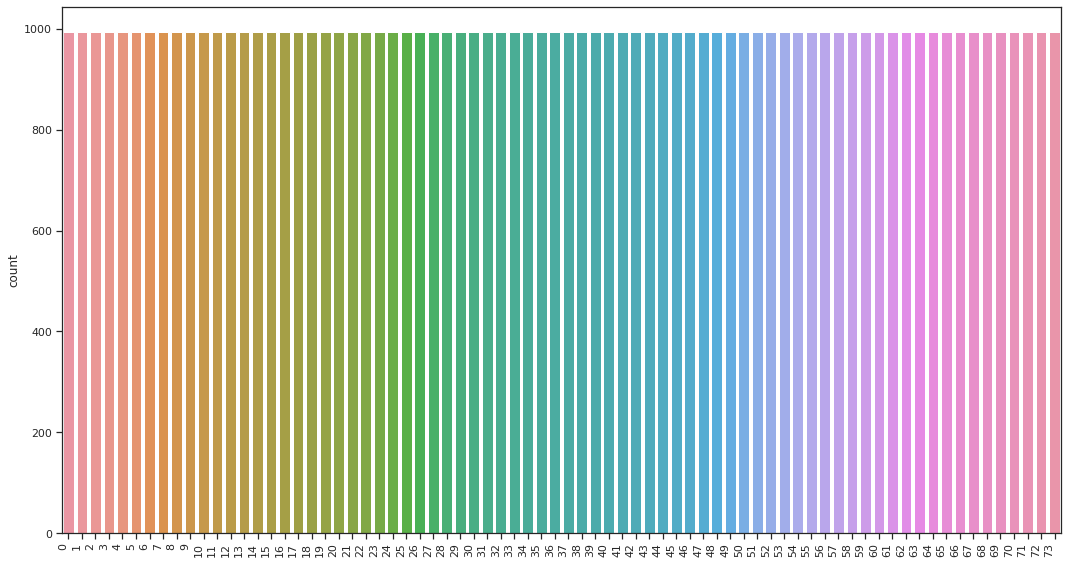

In [0]:
# Checking the distribution of groups
# import matplotlib.pyplot as plt
# plt.hist(y_ros)

plt.figure(figsize=(15,8))
sns.countplot(y_ros)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Implementing K-Fold cross validator for the X and Y to avoid overfitting the test set


In [0]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
split_itr = skf.get_n_splits(X, y)

print(skf)
print(split_itr)
StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in skf.split(X_ros, y_ros):
     print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_test = X_ros[train_index], X_ros[test_index]
     y_train, y_test = y_ros[train_index], y_ros[test_index]
X_train.shape

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
5
TRAIN: [ 1028  1030  1037 ... 73553 73554 73555] TEST: [    0     1     2 ... 71683 71684 71685]
TRAIN: [    0     1     2 ... 73553 73554 73555] TEST: [ 1028  1030  1037 ... 72957 72958 72959]
TRAIN: [    0     1     2 ... 73553 73554 73555] TEST: [ 2543  2544  2545 ... 73155 73156 73157]
TRAIN: [    0     1     2 ... 73553 73554 73555] TEST: [ 4023  4025  4026 ... 73354 73355 73356]
TRAIN: [    0     1     2 ... 73354 73355 73356] TEST: [ 5319  5320  5321 ... 73553 73554 73555]


(58845, 367)

In [0]:
X_train.shape

(58845, 367)

### DEEP LEARNING STARTS

In [0]:
from tensorflow.keras.layers import  Dropout, Dense
from tensorflow.keras.models import Sequential

In [0]:
# Build a DNN Model for Text classification

def Model_DNN(shape, nClasses, dropout=0.5):
    model = Sequential()
    node = maxlen #512 # number of nodes
    nLayers = 4 # number of  hidden layer

    model.add(Dense(node,input_dim=shape,activation='relu'))
    model.add(Dropout(dropout))
    for i in range(0,nLayers):
        model.add(Dense(node,input_dim=node,activation='relu'))
        model.add(Dropout(dropout))
    model.add(Dense(nClasses, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    model.summary()  
    return model


In [0]:
model_DNN = Model_DNN(X_train.shape[1], 74 )

model_DNN.fit(X_train, y_train,
                              validation_data=(X_test,y_test),
                              epochs=20,
                              batch_size=100,
                              verbose=2)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 367)               135056    
_________________________________________________________________
dropout (Dropout)            (None, 367)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 367)               135056    
_________________________________________________________________
dropout_1 (Dropout)          (None, 367)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 367)               135056    
_________________________________________________________________
dropout_2 (Dropout)          (None, 367)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 367)               1

In [0]:
# Final evaluation of the model

scores_DNN_train = model_DNN.evaluate(X_train, y_train, verbose=0)
scores_DNN_test = model_DNN.evaluate(X_test, y_test, verbose=0)
print("Train Acc: %.2f%",  (scores_DNN_train[1]*100))
print("Test Acc: %.2f%",  (scores_DNN_test[1]*100))

# scores_DNN_train

Train Acc: %.2f% 86.16874814033508
Test Acc: %.2f% 85.61620712280273


# To include Stratified k-FOLD enable the following cell of code

In [0]:
# import numpy as np
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=43)
# cvscores = []
# for train_index, test_index in kfold.split(X_ros, y_ros):
#     # create model
#     node = maxlen #512 # number of nodes
#     nLayers = 4 # number of  hidden layer
    
#     model = Sequential()
#     model.add(Dense(node,input_dim=367,activation='relu'))
#     model.add(Dropout(0.5))
#     for i in range(0,nLayers):
#         model.add(Dense(node,input_dim=node,activation='relu'))
#         model.add(Dropout(0.5))
#     model.add(Dense(74, activation='softmax'))
#     model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#     model.fit(X_train,y_train,epochs=20,batch_size=100, verbose=0)
#     scores = model.evaluate(X_test,y_test, verbose=0)
#     print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#     cvscores.append(scores[1]*100)
# print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

In [0]:
pip install h5py


# Save weights to re-use for retraining, May not be required if using k-fold

In [0]:
# # Saving weights to use later:
# from tensorflow.keras.models import model_from_json

# # serialize model to JSON
# model_json = model_DNN.to_json()
# with open("model_DNN.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model_DNN.save_weights("model.h5")
# print("Saved model to disk")

Saved model to disk


In [0]:
# # load json and create model
# json_file = open('model_DNN.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("model.h5")
# print("Loaded model from disk")

# # evaluate loaded model on test data
# loaded_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# score_test = loaded_model.evaluate(X_test, y_test, verbose=0)
# print("Accuracy: %.2f%%" % (score_test[1]*100))


Loaded model from disk
Accuracy: 85.62%


In [0]:
# # Retrain model with saved weights
# json_file_retrain = open('model_DNN.json', 'r')
# loaded_model_json_retrain = json_file_retrain.read()
# json_file_retrain.close()
# loaded_model_retrain = model_from_json(loaded_model_json_retrain)
# # load weights into new model
# loaded_model_retrain.load_weights("model.h5")
# print("Loaded model from disk")

# # evaluate loaded model on test data
# loaded_model_retrain.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# loaded_model_retrain.fit(X_train_set2, y_train_set2, 
#                               validation_split=0.3,
#                               epochs=100,
#                               batch_size=38,
#                               verbose=2)


# score_test_re = loaded_model_retrain.evaluate(X_test, y_test, verbose=0)
# print("Test Accuracy: %.2f%" % (score_test_re[1]*100))

In [0]:

score_train_re = loaded_model_retrain.evaluate(X_test, y_test, verbose=0)
print("Final Test Accuracy: %.2f%%" % (score_train_re[1]*100))